In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
path=r'C:\Users\84280\Desktop\lianxi\NN\ex4data1.mat'
data=loadmat(path)

In [3]:
data
X=data['X']
y=data['y']
print(X.shape,y.shape)

(5000, 400) (5000, 1)


(100, 400)


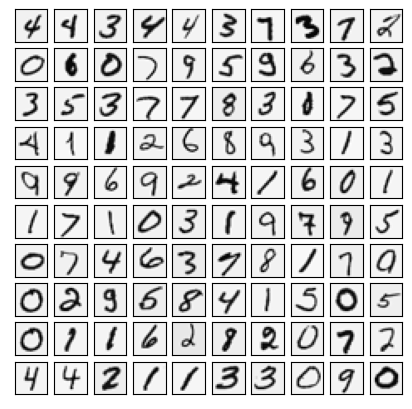

In [4]:
#视觉图片的可视化
def plot_100_image(X):
    sample_index=np.random.choice(len(X),100)# 从列坐标中随机挑选100个
    images=X[sample_index,:]
    print(images.shape)
    fig,ax=plt.subplots(ncols=10,nrows=10,figsize=(5,5),sharex=True,sharey=True)
    plt.xticks([])
    plt.yticks([])
    
    for r in range(10):
        for c in range(10):
            ax[r,c].imshow(images[10*r+c].reshape(20,20).T,cmap='gray_r')
    plt.show
    
plot_100_image(X)
            

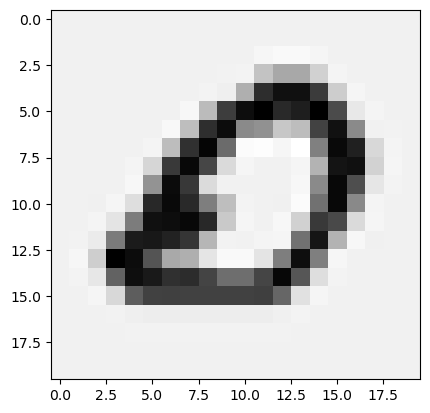

In [5]:
plt.imshow(X[1].reshape(20,20),cmap='gray_r')

In [6]:
X.shape,y.shape

((5000, 400), (5000, 1))

In [7]:
from sklearn.preprocessing import OneHotEncoder
#转换为one-hot编码（独热）
encoder=OneHotEncoder(sparse=False)
y_onehot=encoder.fit_transform(y)
y_onehot.shape

(5000, 10)

In [8]:
y[0],y_onehot[0,:]

(array([10], dtype=uint8), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [9]:
# 构建sigmoid 函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 前向传播的逻辑 400+1 →  25+1 → 10



In [10]:
def forward_propagate(X,theta1,theta2):
    m=X.shape[0]
    
    a1=np.insert(X,0,values=np.ones(m),axis=1)
    z2=a1*theta1.T
    a2=np.insert(sigmoid(z2),0,values=np.ones(m),axis=1)
    z3=a2*theta2.T
    h=sigmoid(z3)
    
    return a1,z2,a2,z3,h

    

In [11]:
# 损失函数 需要对每一层的损失值求和
def cost(params,input_size,hidden_size,num_labels,X,y,learning_rate):
    m=X.shape[0]
    X=np.matrix(X)
    y=np.matrix(y)
    
    # 需要降theta的参数分别设置成符合需要神经元的矩阵
    theta1=np.matrix(np.reshape(params[:hidden_size*(input_size+1)],(hidden_size,(input_size+1))))
    theta2=np.matrix(np.reshape(params[hidden_size*(input_size+1):],(num_labels,(hidden_size+1))))
    
    # 前向传播
    a1,z2,a2,z3,h=forward_propagate(X,theta1,theta2)
    
    # 输出损失函数
    J=0
    for i in range(m):# 需要k 个维度
        first_term=np.multiply(-y[i,:],np.log(h[i,:]))
        second_term=np.multiply(1-y[i,:],np.log(1-h[i,:]))
        J+=np.sum(first_term-second_term)
        
    J=J/m
    
    return J

In [12]:
# 初始化变量
input_size=400
hidden_size=25
num_labels=10
learning_rate=1

#网格参数大小，-0.5是保证对称性，*0.25 是整体缩放
params=(np.random.random(size=hidden_size*(input_size+1)+num_labels*(hidden_size+1))-0.5)*0.25

x=X.shape[0]
X=np.matrix(X)
y=np.matrix(y)


theta1=np.matrix(np.reshape(params[:hidden_size*(input_size+1)],(hidden_size,(input_size+1))))
theta2=np.matrix(np.reshape(params[hidden_size*(input_size+1):],(num_labels,(hidden_size+1))))

theta1.shape, theta2.shape

((25, 401), (10, 26))

In [13]:
a1,z2,a2,z3,h=forward_propagate(X,theta1,theta2)
a1.shape,z2.shape,a2.shape,z3.shape,h.shape

((5000, 401), (5000, 25), (5000, 26), (5000, 10), (5000, 10))

In [14]:
cost(params,input_size,hidden_size,num_labels,X,y_onehot,learning_rate)

7.122091273950182

In [15]:
# 正则化下的损失函数 按照损失函数的样式加入权重项目即可，但是需要注意的是不同层的权重参数个数是不一样的

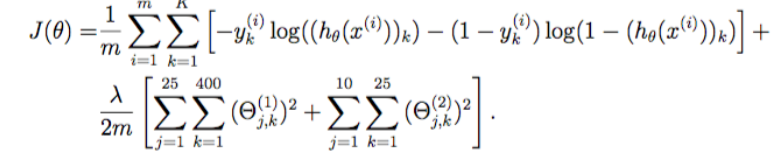

In [16]:
def cost(params,input_size,hidden_size,num_labels,X,y,learning_rate):
    m=X.shape[0]
    X=np.matrix(X)
    y=np.matrix(y)
    
    theta1=np.matrix(np.reshape(params[:hidden_size*(input_size+1)],(hidden_size,(input_size+1))))
    theta2=np.matrix(np.reshape(params[hidden_size*(input_size+1):],(num_labels,(hidden_size+1)))) 
    
    J=0
    delta1=np.zeros(theta1.shape)
    delta2=np.zeros(theta2.shape)
    
    a1,z2,a2,z3,h=forward_propagate(X,theta1,theta2)
    
    for i in range(m):
        first_term=np.multiply(-y[i,:],np.log(h[i,:]))
        second_term=np.multiply(1-y[i,:],np.log(1-h[i,:]))
        J+=np.sum(first_term-second_term)
    J=J/m   
    
    J+=learning_rate*(np.sum(np.power(theta1[:,1:],2))+np.sum(np.power(theta2[:,1:],2)))
    return J


In [17]:
cost(params,input_size,hidden_size,num_labels,X,y_onehot,learning_rate)

61.051212800372554

In [18]:
# sigmoid 函数的导数 f(x)(1-f(x))
def sigmoid_gradient(z):
    return np.multiply(sigmoid(z),1-sigmoid(z))




def backprop(params, input_size, hidden_size, num_labels, X, y, learning_rate):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * (input_size + 1)], (hidden_size, (input_size + 1))))
    theta2 = np.matrix(np.reshape(params[hidden_size * (input_size + 1):], (num_labels, (hidden_size + 1))))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # initializations
    J = 0
    delta1 = np.zeros(theta1.shape)  # (25, 401)
    delta2 = np.zeros(theta2.shape)  # (10, 26)
    
    # compute the cost
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    # add the cost regularization term
    J += (float(learning_rate) / (2 * m)) * (np.sum(np.power(theta1[:,1:], 2)) + np.sum(np.power(theta2[:,1:], 2)))
    
    # perform backpropagation
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t)) # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    
    # add the gradient regularization term
    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
    
    return J, grad
    
            
    for t in range(m):
        a1t=a1[t,:] #(1,401) #前向传播加截距项之后
        z2t=z2[t,:] #(1,25) #前向传播 ×上权重之后
        a2t=a2[t,:] #(1,26) #前向传播在隐藏曾用激活函数激活后的数据
        ht=h[t,:]#(1,10) #前向传播乘 隐藏层的权重后再用激活函数激活后的数据
        yt=y[t,:]#(1,10) #实际值
        
        d3t=ht-yt #(1,10) #因为需要求损失函数对sigmoid函数的偏微分，损失函数对输出成求微分正好等于这个式子
        
        z2t=np.insert(z2t,0,values=np.ones(1)) # (1,26) 
        d2t=np.multiply((theta2.T*d3t.T).T,sigmoid_gradient(z2t)) #（1，26） # 这里面 包含了偏置项
        
        delta1=delta1+(d2t[:,1:]).T*a1t
        delta2=delta2+d3t.T*a2t

In [43]:
# 构建反向传播函数,用来计算梯度
def backprop(params,input_size,hidden_size,num_labels,X,y,learning_rate):
    m=X.shape[0]
    X=np.matrix(X)
    y=np.matrix(y)
    
    #重新构建随机的权重参数

    theta1=np.matrix(np.reshape(params[:hidden_size*(input_size+1)],(hidden_size,(input_size+1))))
    theta2=np.matrix(np.reshape(params[hidden_size*(input_size+1):],(num_labels,(hidden_size+1))))
    
    
    #先跑前向传播，计算后得到各个节点的参数(后面需要计算损失函数)
    
    a1,z2,a2,z3,h=forward_propagate(X,theta1,theta2)
    
    #对损失函数的参数进行初始化
    J=0
    delta1=np.zeros(theta1.shape)
    delta2=np.zeros(theta2.shape)
        # 输出损失函数
    for i in range(m):
        first_term=np.multiply(-y[i,:],np.log(h[i,:]))
        second_term=np.multiply((1-y[i,:]),np.log(1-h[i,:]))
        J+=np.sum(first_term-second_term)
        
    J=J/(m)
    
    J+=(float(learning_rate)/(2*m))*(np.sum(np.power(theta1[:,1:],2))+np.sum(np.power(theta2[:,1:],2)))
 
    
    # 执行反向传播
    for t in range(m):
        a1t = a1[t,:]  # (1, 401)
        z2t = z2[t,:]  # (1, 25)
        a2t = a2[t,:]  # (1, 26)
        ht = h[t,:]  # (1, 10)
        yt = y[t,:]  # (1, 10)
        
        d3t = ht - yt  # (1, 10)
        
        z2t = np.insert(z2t, 0, values=np.ones(1))  # (1, 26)
        d2t = np.multiply((theta2.T * d3t.T).T, sigmoid_gradient(z2t)) # (1, 26)
        
        delta1 = delta1 + (d2t[:,1:]).T * a1t
        delta2 = delta2 + d3t.T * a2t


    delta1=delta1/m
    delta2=delta2/m
    
    # 加入正则项
        

    delta1[:,1:] = delta1[:,1:] + (theta1[:,1:] * learning_rate) / m
    delta2[:,1:] = delta2[:,1:] + (theta2[:,1:] * learning_rate) / m
    
    grad = np.concatenate((np.ravel(delta1), np.ravel(delta2)))
                        
    return J,grad
        
    

In [44]:
J,grad=backprop(params,input_size,hidden_size,num_labels,X,y_onehot,learning_rate)
J,grad.shape

(7.127484186102824, (10285,))

In [45]:
from scipy.optimize import minimize


In [46]:
fmin = minimize(fun=backprop, x0=params, args=(input_size, hidden_size, num_labels, X, y_onehot, learning_rate), 
                method='TNC', jac=True, options={'maxiter': 250})
fmin

C:\Users\84280\AppData\Local\Temp\ipykernel_9888\2111293107.py:1: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  fmin = minimize(fun=backprop, x0=params, args=(input_size, hidden_size, num_labels, X, y_onehot, learning_rate),
C:\Users\84280\AppData\Local\Temp\ipykernel_9888\2822739621.py:24: RuntimeWarning: divide by zero encountered in log
  second_term=np.multiply((1-y[i,:]),np.log(1-h[i,:]))
C:\Users\84280\AppData\Local\Temp\ipykernel_9888\2822739621.py:24: RuntimeWarning: invalid value encountered in multiply
  second_term=np.multiply((1-y[i,:]),np.log(1-h[i,:]))


     fun: 0.43397016880606865
     jac: array([-8.85714099e-04,  4.28151202e-08, -6.71440082e-06, ...,
        6.26776596e-04,  3.32519197e-04,  1.27134206e-03])
 message: 'Linear search failed'
    nfev: 210
     nit: 14
  status: 4
 success: False
       x: array([-1.43735553e+00,  2.14075601e-04, -3.35720041e-02, ...,
        6.48744506e-01, -2.48445029e+00, -3.91576448e-01])

In [47]:
X=np.matrix(X)
theta1=np.matrix(np.reshape(fmin.x[:hidden_size*(input_size+1)],(hidden_size,(input_size+1))))
theta2=np.matrix(np.reshape(fmin.x[hidden_size*(input_size+1):],(num_labels,(hidden_size+1))))

a1,z2,a2,z3,h=forward_propagate(X,theta1,theta2)
y_pred=np.array(np.argmax(h,axis=1)+1)



In [48]:
y_pred

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [49]:
correct=[1 if a==b else 0 for (a,b) in zip(y_pred,y)]
accuracy=(sum(map(int,correct))/float(len(correct)))
accuracy

0.968